In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy as _np
import pandas as pd
import pandas as _pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as _plt


from modelbase.ode import Model, LinearLabelModel, Simulator

Could not find GLIMDA.


# Definitions

In [2]:
labelcompounds = {
    "PGA": 3,
    "BPGA": 3,
    "GAP": 3,
    "DHAP": 3,
    "FBP": 6,
    "F6P": 6,
    "E4P": 4,
    "G6P": 6,
    "G1P": 6,
    "SBP": 7,
    "S7P": 7,
    "X5P": 5,
    "R5P": 5,
    "RU5P": 5,
    "RUBP": 5,
}

labelmaps = {
    "v1": [2, 1, 0, 5, 3, 4],
    "v2f": [0, 1, 2],
    "v2r": [0, 1, 2],
    "v3f": [0, 1, 2],
    "v3r": [0, 1, 2],
    "v4f": [2, 1, 0],
    "v4r": [2, 1, 0],
    "v5f": [0, 1, 2, 3, 4, 5],
    "v5r": [0, 1, 2, 3, 4, 5],
    "v6": [0, 1, 2, 3, 4, 5],
    "v7f": [0, 1, 6, 7, 8, 2, 3, 4, 5],
    "v7r": [0, 1, 5, 6, 7, 8, 2, 3, 4],
    "v8f": [0, 1, 2, 3, 4, 5, 6],
    "v8r": [0, 1, 2, 3, 4, 5, 6],
    "v9": [0, 1, 2, 3, 4, 5, 6],
    "v10f": [0, 1, 7, 8, 9, 2, 3, 4, 5, 6],
    "v10r": [0, 1, 5, 6, 7, 8, 9, 2, 3, 4],
    "v11f": [0, 1, 2, 3, 4],
    "v11r": [0, 1, 2, 3, 4],
    "v12f": [0, 1, 2, 3, 4],
    "v12r": [0, 1, 2, 3, 4],
    "v13": [0, 1, 2, 3, 4],
    "v14f": [0, 1, 2, 3, 4, 5],
    "v14r": [0, 1, 2, 3, 4, 5],
    "v15f": [0, 1, 2, 3, 4, 5],
    "v15r": [0, 1, 2, 3, 4, 5],
    "vSt": [0, 1, 2, 3, 4, 5],
    "vPGA_out": [0, 1, 2],
    "vGAP_out": [0, 1, 2],
    "vDHAP_out": [0, 1, 2],
}

## Parameters

In [3]:
parameters = {
    "Vmax_1": 2.72,  # [mM/s], Pettersson 1988
    "Vmax_6": 1.6,  # [mM/s], Pettersson 1988
    "Vmax_9": 0.32,  # [mM/s], Pettersson 1988
    "Vmax_13": 8.0,  # [mM/s], Pettersson 1988
    "Vmax_16": 2.8,  # [mM/s], Pettersson 1988
    "Vmax_starch": 0.32,  # [mM/s], Pettersson 1988
    "Vmax_efflux": 2.0,  # [mM/s], Pettersson 1988
    "Km_1": 0.02,  # [mM], Pettersson 1988
    "Km_6": 0.03,  # [mM], Pettersson 1988
    "Km_9": 0.013,  # [mM], Pettersson 1988
    "Km_13_1": 0.05,  # [mM], Pettersson 1988
    "Km_13_2": 0.05,  # [mM], Pettersson 1988
    "Km_16_1": 0.014,  # [mM], Pettersson 1988
    "Km_16_2": 0.3,  # [mM], Pettersson 1988
    "Km_starch_1": 0.08,  # [mM], Pettersson 1988
    "Km_starch_2": 0.08,  # [mM], Pettersson 1988
    "K_pga": 0.25,  # [mM], Pettersson 1988
    "K_gap": 0.075,  # [mM], Pettersson 1988
    "K_dhap": 0.077,  # [mM], Pettersson 1988
    "K_pi": 0.63,  # [mM], Pettersson 1988
    "K_pxt": 0.74,  # [mM], Pettersson 1988
    "Ki_1_1": 0.04,  # [mM], Pettersson 1988
    "Ki_1_2": 0.04,  # [mM], Pettersson 1988
    "Ki_1_3": 0.075,  # [mM], Pettersson 1988
    "Ki_1_4": 0.9,  # [mM], Pettersson 1988
    "Ki_1_5": 0.07,  # [mM], Pettersson 1988
    "Ki_6_1": 0.7,  # [mM], Pettersson 1988
    "Ki_6_2": 12.0,  # [mM], Pettersson 1988
    "Ki_9": 12.0,  # [mM], Pettersson 1988
    "Ki_13_1": 2.0,  # [mM], Pettersson 1988
    "Ki_13_2": 0.7,  # [mM], Pettersson 1988
    "Ki_13_3": 4.0,  # [mM], Pettersson 1988
    "Ki_13_4": 2.5,  # [mM], Pettersson 1988
    "Ki_13_5": 0.4,  # [mM], Pettersson 1988
    "Ki_starch": 10.0,  # [mM], Pettersson 1988
    "Ka_starch_1": 0.1,  # [mM], Pettersson 1988
    "Ka_starch_2": 0.02,  # [mM], Pettersson 1988
    "Ka_starch_3": 0.02,  # [mM], Pettersson 1988
    "q2": 0.00031,  # [], Pettersson 1988
    "q3": 16000000.0,  # [], Pettersson 1988
    "q4": 22.0,  # [], Pettersson 1988
    "q5": 7.1,  # [1/mM]], Pettersson 1988
    "q7": 0.084,  # [], Pettersson 1988
    "q8": 13.0,  # [1/mM]], Pettersson 1988
    "q10": 0.85,  # [], Pettersson 1988
    "q11": 0.4,  # [], Pettersson 1988
    "q12": 0.67,  # [], Pettersson 1988
    "q14": 2.3,  # [], Pettersson 1988
    "q15": 0.058,  # [], Pettersson 1988
    "CO2": 0.2,  # [mM], Pettersson 1988
    "Phosphate_total": 15.0,  # [mM], Pettersson 1988
    "P_pool_ext": 0.5,  # [mM], Pettersson 1988
    "AP_total": 0.5,  # [mM], Pettersson 1988
    "N_total": 0.5,  # [mM], Pettersson 1988
    "pH_medium": 7.6,  # [], Pettersson 1988
    "pH_stroma": 7.9,  # [], Pettersson 1988
    "proton_pool_stroma": 1.2589254117941661e-05,  # [mM], Pettersson 1988
    "NADPH_pool": 0.21,  # [mM], Pettersson 1988
    "NADP_pool": 0.29,  # [mM], Pettersson 1988
    "k2f": 8e8,  # k_rapid_eq
    "k2r": 8e8,  # k_rapid_eq
    "k3f": 8e8,  # k_rapid_eq
    "k3r": 8e8,  # k_rapid_eq
    "k4f": 8e8,  # k_rapid_eq
    "k4r": 8e8,  # k_rapid_eq
    "k5f": 8e8,  # k_rapid_eq
    "k5r": 8e8,  # k_rapid_eq
    "k7f": 8e8,  # k_rapid_eq
    "k7r": 8e8,  # k_rapid_eq
    "k8f": 8e8,  # k_rapid_eq
    "k8r": 8e8,  # k_rapid_eq
    "k10f": 8e8,  # k_rapid_eq
    "k10r": 8e8,  # k_rapid_eq
    "k11f": 8e8,  # k_rapid_eq
    "k11r": 8e8,  # k_rapid_eq
    "k12f": 8e8,  # k_rapid_eq
    "k12r": 8e8,  # k_rapid_eq
    "k14f": 8e8,  # k_rapid_eq
    "k14r": 8e8,  # k_rapid_eq
    "k15f": 8e8,  # k_rapid_eq
    "k15r": 8e8,  # k_rapid_eq
}

In [4]:
print("#"*79)

###############################################################################


## Rate functions

In [5]:
def ADP(ATP, AP_total):
    return [AP_total - ATP]


def P_i(
    PGA,
    BPGA,
    GAP,
    DHAP,
    FBP,
    F6P,
    G6P,
    G1P,
    SBP,
    S7P,
    E4P,
    X5P,
    R5P,
    RUBP,
    RU5P,
    ATP,
    phosphate_total,
):
    return [
        phosphate_total
        - (
            PGA
            + 2 * BPGA
            + GAP
            + DHAP
            + 2 * FBP
            + F6P
            + G6P
            + G1P
            + 2 * SBP
            + S7P
            + E4P
            + X5P
            + R5P
            + 2 * RUBP
            + RU5P
            + ATP
        )
    ]


def N(
    P_pool, PGA, GAP, DHAP, Kpxt, Pext, Kpi, Kpga, Kgap, Kdhap,
):
    return [
        (
            1
            + (1 + (Kpxt / Pext))
            * (
                (P_pool / Kpi)
                + (PGA / Kpga)
                + (GAP / Kgap)
                + (DHAP / Kdhap)
            )
        )
    ]

In [6]:
def v1(
    RUBP, PGA, FBP, SBP, P_pool, V1, Km1, Ki11, Ki12, Ki13, Ki14, Ki15, NADPH_pool,
):
    return (V1 * RUBP) / (
        RUBP
        + Km1
        * (
            1
            + (PGA / Ki11)
            + (FBP / Ki12)
            + (SBP / Ki13)
            + (P_pool / Ki14)
            + (NADPH_pool / Ki15)
        )
    )


def v6(FBP, F6P, P, V6, Km6, Ki61, Ki62):
    return (V6 * FBP) / (FBP + Km6 * (1 + (F6P / Ki61) + (P / Ki62)))


def v9(SBP, P, V9, Km9, Ki9):
    return (V9 * SBP) / (SBP + Km9 * (1 + (P / Ki9)))


def v13(
    RU5P,
    ATP,
    PGA,
    RUBP,
    ADP,
    P_pool,
    V13,
    Km131,
    Km132,
    Ki131,
    Ki132,
    Ki133,
    Ki134,
    Ki135,
):
    return (V13 * RU5P * ATP) / (
        (RU5P + Km131 * (1 + (PGA / Ki131) + (RUBP / Ki132) + (P_pool / Ki133)))
        * (ATP * (1 + (ADP / Ki134)) + Km132 * (1 + (ADP / Ki135)))
    )


def v16(ADP, Phosphate_i, V16, Km161, Km162):
    return (V16 * ADP * Phosphate_i) / ((ADP + Km161) * (Phosphate_i + Km162))


def vStarchProduction(
    G1P, ATP, PGA, F6P, FBP, ADP, P_pool, Vst, Kmst1, Kmst2, Kist, Kast1, Kast2, Kast3,
):
    return (Vst * G1P * ATP) / (
        (G1P + Kmst1)
        * (
            (1 + (ADP / Kist)) * (ATP + Kmst2)
            + ((Kmst2 * P_pool) / (Kast1 * PGA + Kast2 * F6P + Kast3 * FBP))
        )
    )


def v_out(s1, N_total, VMax_efflux, K_efflux):
    return (VMax_efflux * s1) / (N_total * K_efflux)

In [7]:
def mass_action_1(S1, kf):
    return kf * S1


def mass_action_2(S1, S2, kf):
    return kf * S1 * S2


def qssa_mass_action_1(S1, kr, keq):
    return kr * S1 / keq


def qssa_mass_action_2(S1, S2, kr, keq):
    return kr * S1 * S2 / keq


def v3f(BPGA, k3f, NADPH_pool, proton_pool_stroma):
    return k3f * NADPH_pool * BPGA * proton_pool_stroma


def qssa_v3r(GAP, P_i, k3r, q3, NADP_pool):
    return k3r * GAP * NADP_pool * P_i / (q3)


def v3r(GAP, P_i, k3r, NADP_pool):
    return k3r * GAP * NADP_pool * P_i

# Poolman model

## Base Model

In [8]:
m_poolman_base = Model(parameters=parameters)
m_poolman_base.add_compound("ATP")
m_poolman_base.add_compounds(
    [
        "PGA",
        "BPGA",
        "GAP",
        "DHAP",
        "FBP",
        "F6P",
        "E4P",
        "G6P",
        "G1P",
        "SBP",
        "S7P",
        "X5P",
        "R5P",
        "RU5P",
        "RUBP",
    ]
)

### Algebraic modules

In [9]:
m_poolman_base.add_algebraic_module(
    module_name="ADP_mod",
    function=ADP,
    compounds=["ATP"],
    derived_compounds=["ADP"],
    parameters=["AP_total"],
)
m_poolman_base.add_algebraic_module(
    module_name="Pi_mod",
    function=P_i,
    compounds=[
        "PGA",
        "BPGA",
        "GAP",
        "DHAP",
        "FBP",
        "F6P",
        "G6P",
        "G1P",
        "SBP",
        "S7P",
        "E4P",
        "X5P",
        "R5P",
        "RUBP",
        "RU5P",
        "ATP",
    ],
    derived_compounds=["P_pool"],
    parameters=["Phosphate_total"],
)
m_poolman_base.add_algebraic_module(
    module_name="N_mod",
    function=N,
    compounds=["P_pool", "PGA", "GAP", "DHAP",],
    derived_compounds=["N_pool"],
    parameters=[
        "K_pxt",
        "P_pool_ext",
        "K_pi",
        "K_pga",
        "K_gap",
        "K_dhap",
    ],
)

### Rapid equilibrium reactions

In [10]:
m_poolman_base.add_reaction(
    "v2f",
    function=mass_action_2,
    stoichiometry={"PGA": -1, "ATP": -1, "BPGA": 1},
    parameters=["k2f"],
)


m_poolman_base.add_reaction(
    "v2r",
    function=qssa_mass_action_2,
    stoichiometry={"BPGA": -1, "PGA": 1, "ATP": 1},
    modifiers=["ADP"],
    parameters=["k2r", "q2"],
)


m_poolman_base.add_reaction(
    "v3f",
    function=v3f,
    stoichiometry={"BPGA": -1, "GAP": 1},
    parameters=["k3f", "NADPH_pool", "proton_pool_stroma"],
)


m_poolman_base.add_reaction(
    "v3r",
    function=qssa_v3r,
    stoichiometry={"GAP": -1, "BPGA": 1},
    modifiers=["P_pool"],
    parameters=["k3r", "q3", "NADP_pool",],
)


m_poolman_base.add_reaction(
    "v4f",
    function=mass_action_1,
    stoichiometry={"GAP": -1, "DHAP": 1},
    parameters=["k4f"],
)


m_poolman_base.add_reaction(
    "v4r",
    function=qssa_mass_action_1,
    stoichiometry={"DHAP": -1, "GAP": 1},
    parameters=["k4r", "q4"],
)


m_poolman_base.add_reaction(
    "v5f",
    function=mass_action_2,
    stoichiometry={"DHAP": -1, "GAP": -1, "FBP": 1},
    parameters=["k5f"],
)


m_poolman_base.add_reaction(
    "v5r",
    function=qssa_mass_action_1,
    stoichiometry={"FBP": -1, "DHAP": 1, "GAP": 1},
    parameters=["k5r", "q5"],
)


m_poolman_base.add_reaction(
    "v7f",
    function=mass_action_2,
    stoichiometry={"F6P": -1, "GAP": -1, "X5P": 1, "E4P": 1},
    parameters=["k7f"],
)


m_poolman_base.add_reaction(
    "v7r",
    function=qssa_mass_action_2,
    stoichiometry={"X5P": -1, "E4P": -1, "F6P": 1, "GAP": 1},
    parameters=["k7r", "q7"],
)


m_poolman_base.add_reaction(
    "v8f",
    function=mass_action_2,
    stoichiometry={"DHAP": -1, "E4P": -1, "SBP": 1},
    parameters=["k8f"],
)


m_poolman_base.add_reaction(
    "v8r",
    function=qssa_mass_action_1,
    stoichiometry={"SBP": -1, "DHAP": 1, "E4P": 1},
    parameters=["k8r", "q8"],
)


m_poolman_base.add_reaction(
    "v10f",
    function=mass_action_2,
    stoichiometry={"S7P": -1, "GAP": -1, "X5P": 1, "R5P": 1},
    parameters=["k10f"],
)


m_poolman_base.add_reaction(
    "v10r",
    function=qssa_mass_action_2,
    stoichiometry={"X5P": -1, "R5P": -1, "S7P": 1, "GAP": 1},
    parameters=["k10r", "q10"],
)


m_poolman_base.add_reaction(
    "v11f",
    function=mass_action_1,
    stoichiometry={"R5P": -1, "RU5P": 1},
    parameters=["k11f"],
)


m_poolman_base.add_reaction(
    "v11r",
    function=qssa_mass_action_1,
    stoichiometry={"RU5P": -1, "R5P": 1},
    parameters=["k11r", "q11"],
)


m_poolman_base.add_reaction(
    "v12f",
    function=mass_action_1,
    stoichiometry={"X5P": -1, "RU5P": 1},
    parameters=["k12f"],
)


m_poolman_base.add_reaction(
    "v12r",
    function=qssa_mass_action_1,
    stoichiometry={"RU5P": -1, "X5P": 1},
    parameters=["k12r", "q12"],
)


m_poolman_base.add_reaction(
    "v14f",
    function=mass_action_1,
    stoichiometry={"F6P": -1, "G6P": 1},
    parameters=["k14f"],
)


m_poolman_base.add_reaction(
    "v14r",
    function=qssa_mass_action_1,
    stoichiometry={"G6P": -1, "F6P": 1},
    parameters=["k14r", "q14"],
)


m_poolman_base.add_reaction(
    "v15f",
    function=mass_action_1,
    stoichiometry={"G6P": -1, "G1P": 1},
    parameters=["k15f"],
)


m_poolman_base.add_reaction(
    "v15r",
    function=qssa_mass_action_1,
    stoichiometry={"G1P": -1, "G6P": 1},
    parameters=["k15r", "q15"],
)

### Reactions

In [11]:
m_poolman_base.add_reaction(
    rate_name="v1",
    function=v1,
    stoichiometry={"RUBP": -1, "PGA": 2},
    modifiers=["PGA", "FBP", "SBP", "P_pool",],
    parameters=[
        "Vmax_1",
        "Km_1",
        "Ki_1_1",
        "Ki_1_2",
        "Ki_1_3",
        "Ki_1_4",
        "Ki_1_5",
        "NADPH_pool",
    ],
)

m_poolman_base.add_reaction(
    rate_name="v6",
    function=v6,
    stoichiometry={"FBP": -1, "F6P": 1},
    modifiers=["F6P", "P_pool"],
    parameters=["Vmax_6", "Km_6", "Ki_6_1", "Ki_6_2"],
)

m_poolman_base.add_reaction(
    rate_name="v9",
    function=v9,
    stoichiometry={"SBP": -1, "S7P": 1},
    modifiers=["P_pool"],
    parameters=["Vmax_9", "Km_9", "Ki_9"],
)

m_poolman_base.add_reaction(
    rate_name="v13",
    function=v13,
    stoichiometry={"RU5P": -1, "ATP": -1, "RUBP": 1},
    modifiers=["PGA", "RUBP", "ADP", "P_pool",],
    parameters=[
        "Vmax_13",
        "Km_13_1",
        "Km_13_2",
        "Ki_13_1",
        "Ki_13_2",
        "Ki_13_3",
        "Ki_13_4",
        "Ki_13_5",
    ],
)

m_poolman_base.add_reaction(
    rate_name="v16",
    function=v16,
    stoichiometry={"ATP": 1},
    modifiers=["ADP", "P_pool"],
    parameters=["Vmax_16", "Km_16_1", "Km_16_2"],
)


m_poolman_base.add_reaction(
    rate_name="vSt",
    function=vStarchProduction,
    stoichiometry={"G1P": -1, "ATP": -1},
    modifiers=["PGA", "F6P", "FBP", "ADP", "P_pool"],
    parameters=[
        "Vmax_starch",
        "Km_starch_1",
        "Km_starch_2",
        "Ki_starch",
        "Ka_starch_1",
        "Ka_starch_2",
        "Ka_starch_3",
    ],
)

m_poolman_base.add_reaction(
    rate_name="vPGA_out",
    function=v_out,
    stoichiometry={"PGA": -1},
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_pga"],
)
m_poolman_base.add_reaction(
    rate_name="vGAP_out",
    function=v_out,
    stoichiometry={"GAP": -1},
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_gap"],
)
m_poolman_base.add_reaction(
    rate_name="vDHAP_out",
    function=v_out,
    stoichiometry={"DHAP": -1},
    modifiers=["N_pool"],
    parameters=["Vmax_efflux", "K_dhap"],
)

In [12]:
poolman_base_y0 = {
    "PGA": 0.6437280277346407,
    "BPGA": 0.001360476366780556,
    "GAP": 0.011274125311289358,
    "DHAP": 0.24803073890728228,
    "FBP": 0.019853938009873073,
    "F6P": 1.0950701164493861,
    "E4P": 0.028511831060903877,
    "G6P": 2.5186612678035734,
    "G1P": 0.14608235353185037,
    "SBP": 0.09193353265673603,
    "S7P": 0.23124426886012006,
    "X5P": 0.036372985623662736,
    "R5P": 0.06092475016463224,
    "RUBP": 0.24993009253928708,
    "RU5P": 0.02436989993734177,
    "ATP": 0.43604115800259613,
}

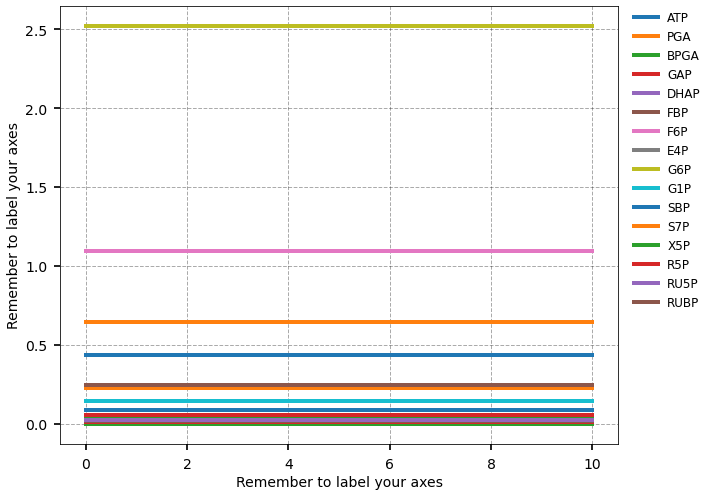

In [13]:
s_poolman_base = Simulator(m_poolman_base)
s_poolman_base.initialise(poolman_base_y0)
t, y = s_poolman_base.simulate(10)
fig, ax = s_poolman_base.plot()

y_ss_poolman = dict(zip(m_poolman_base.compounds, y[-1]))
v_ss_poolman = {k: v[0] for k, v in m_poolman_base.get_fluxes_dict(y_ss_poolman).items()}

## LabelModel

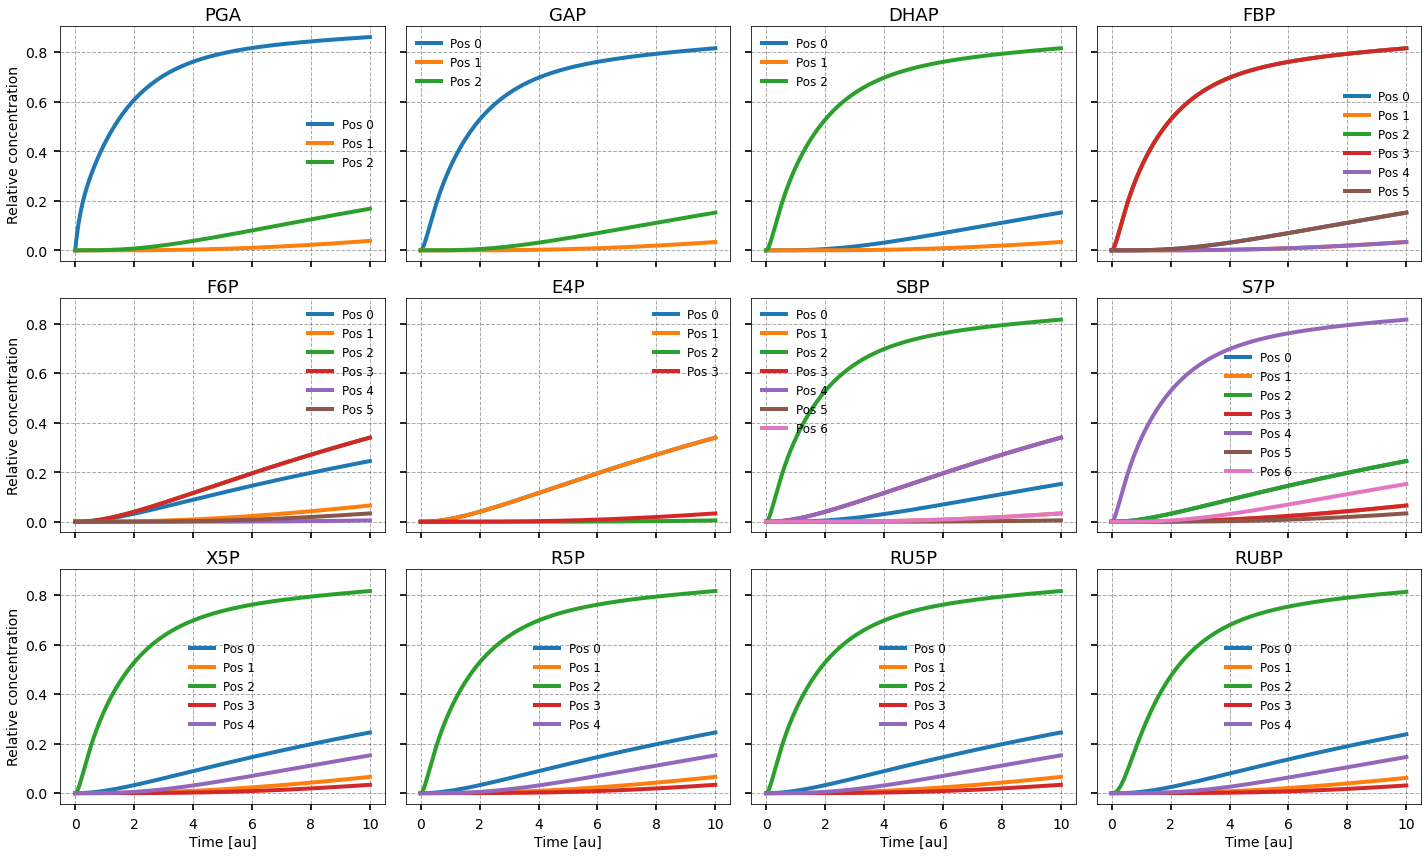

In [14]:
llm_poolman = m_poolman_base.to_linear_labelmodel(
    labelcompounds=labelcompounds, labelmaps=labelmaps,
)

y0_poolman = llm_poolman.generate_y0(initial_labels={})
lls_poolman = Simulator(llm_poolman)
lls_poolman.initialise(y0_poolman, y_ss_poolman, v_ss_poolman)

t, y = lls_poolman.simulate(10, **{"maxnef": 10, "maxncf": 7})
fig, ax = lls_poolman.plot_label_distribution_grid(
    compounds=[
        "PGA",
        "GAP",
        "DHAP",
        "FBP",
        "F6P",
        "E4P",
        "SBP",
        "S7P",
        "X5P",
        "R5P",
        "RU5P",
        "RUBP",
    ],
    sharey=True,
    xlabels="Time [au]",
)
plt.show()

# Mass - action model

In [15]:
m_bassham_base = m_poolman_base.copy()
m_bassham_base.remove_parameters(
    [
        "q2",
        "q3",
        "q4",
        "q5",
        "q7",
        "q8",
        "q10",
        "q11",
        "q12",
        "q14",
        "q15",
        "Vmax_efflux",
    ]
)
m_bassham_base.add_parameters(
    {
        "Vmax_efflux_PGA": 1.1066699104291686,
        "Vmax_efflux_GAP": 0.8479624058609916,
        "Vmax_efflux_DHAP": 0.9327585789768257,
    }
)
m_bassham_base.update_parameters(
    {
        "k2f": 9.201751269188145,
        "k2r": 32582.211592466298,
        "k3f": 544637974.9812177,
        "k3r": 6.770073507981515e-05,
        "k4f": 71.12668763739163,
        "k4r": 2.536954631987327,
        "k5f": 26.59188391761439,
        "k5r": 2.857113867555865,
        "k7f": 19.397240851045034,
        "k7r": 171.32156056378304,
        "k8f": 70.05167257677905,
        "k8r": 5.610915648763027,
        "k10f": 35.747464921294416,
        "k10r": 37.35248352641369,
        "k11f": 48.64771237135582,
        "k11r": 116.41666392881288,
        "k12f": 157.52592237170072,
        "k12r": 232.8333228289382,
        "k14f": 0.049555583505605835,
        "k14r": 0.021677578735797107,
        "k15f": 0.014301375975283213,
        "k15r": 1.3767755716272655e-10,
        "Vmax_1": 1.1470205806062528,
        "Vmax_6": 0.4549249003859781,
        "Vmax_9": 0.30125280912820146,
        "Vmax_13": 24.755929769008766,
        "Vmax_16": 2.6270790430755477,
        "Vmax_starch": 0.1223590855373052,
    }
)


m_bassham_base.update_reaction(
    rate_name="v2r", function=mass_action_2, parameters=["k2r"],
)
m_bassham_base.update_reaction(
    rate_name="v3r", function=v3r, parameters=["k3r", "NADP_pool"],
)
m_bassham_base.update_reaction(
    rate_name="v4r", function=mass_action_1, parameters=["k4r"]
)
m_bassham_base.update_reaction(
    rate_name="v5r", function=mass_action_1, parameters=["k5r"]
)
m_bassham_base.update_reaction(
    rate_name="v7r", function=mass_action_2, parameters=["k7r"]
)
m_bassham_base.update_reaction(
    rate_name="v8r", function=mass_action_1, parameters=["k8r"]
)
m_bassham_base.update_reaction(
    rate_name="v10r", function=mass_action_2, parameters=["k10r"]
)
m_bassham_base.update_reaction(
    rate_name="v11r", function=mass_action_1, parameters=["k11r"]
)
m_bassham_base.update_reaction(
    rate_name="v12r", function=mass_action_1, parameters=["k12r"]
)
m_bassham_base.update_reaction(
    rate_name="v14r", function=mass_action_1, parameters=["k14r"]
)
m_bassham_base.update_reaction(
    rate_name="v15r", function=mass_action_1, parameters=["k15r"]
)


m_bassham_base.update_reaction(
    rate_name="vPGA_out",
    parameters=["Vmax_efflux_PGA", "K_pga"],
)
m_bassham_base.update_reaction(
    rate_name="vGAP_out",
    parameters=["Vmax_efflux_GAP", "K_gap"],
)
m_bassham_base.update_reaction(
    rate_name="vDHAP_out",
    parameters=["Vmax_efflux_DHAP", "K_dhap"],
)

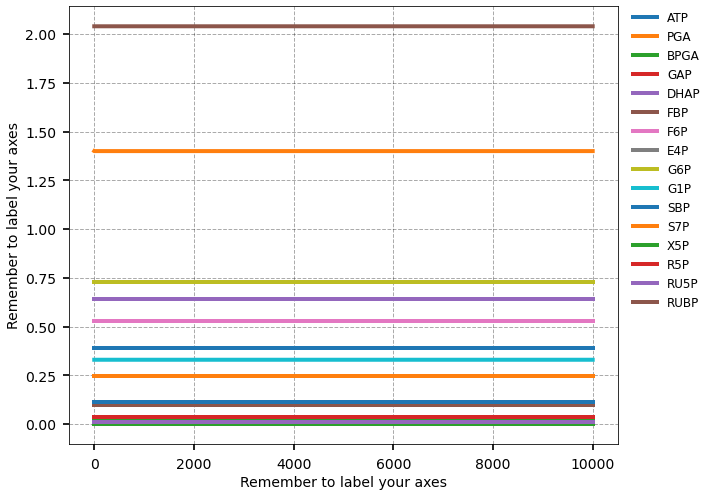

In [16]:
y0_bassham = {
    "PGA": 1.4,
    "BPGA": 0.001,  # Guessed
    "GAP": 0.032,
    "DHAP": 0.64,
    "FBP": 0.097,
    "F6P": 0.53,
    "E4P": 0.02,
    "G6P": 0.73,
    "G1P": 0.33,  # Guessed
    "SBP": 0.114,
    "S7P": 0.248,
    "X5P": 0.021,
    "R5P": 0.034,
    "RUBP": 2.04,
    "RU5P": 0.012,
    "ATP": 0.39,  # Pettersson
}

s_bassham_base = Simulator(m_bassham_base)
s_bassham_base.initialise(y0_bassham)
t, y = s_bassham_base.simulate(10000)
fig, ax = s_bassham_base.plot()

y_ss_bassham = dict(zip(m_bassham_base.compounds, y[-1]))
v_ss_bassham = {
    k: v[0] for k, v in m_bassham_base.get_fluxes_dict(y_ss_bassham).items()
}

## LabelModel

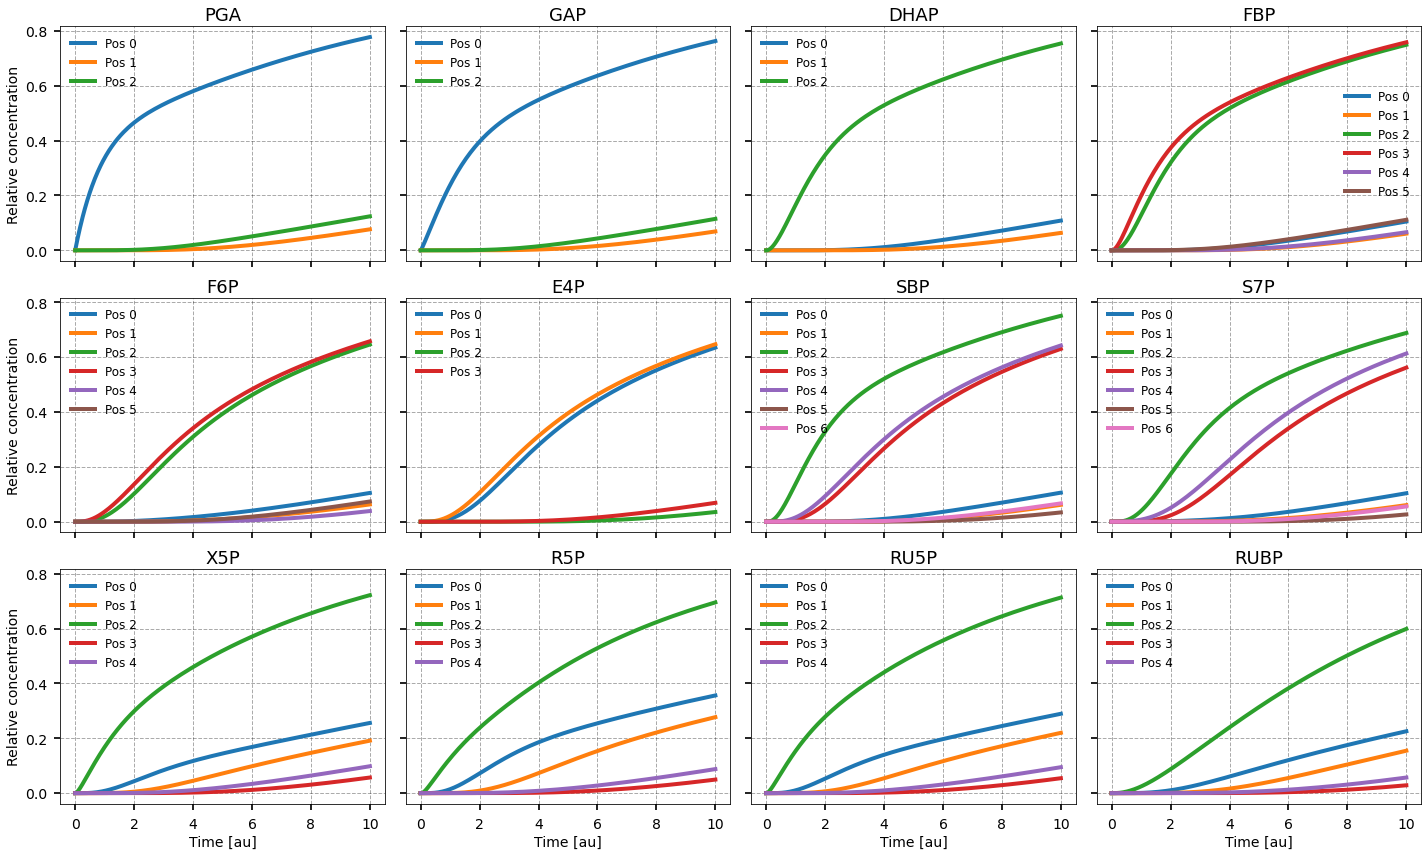

In [17]:
llm_bassham = m_bassham_base.to_linear_labelmodel(
    labelcompounds=labelcompounds, labelmaps=labelmaps,
)

llm_y0_bassham = llm_bassham.generate_y0({})
lls_bassham = Simulator(llm_bassham)
lls_bassham.initialise(llm_y0_bassham, y_ss_bassham, v_ss_bassham)

t, y = lls_bassham.simulate(10)
fig, ax = lls_bassham.plot_label_distribution_grid(
    compounds=[
        "PGA",
        "GAP",
        "DHAP",
        "FBP",
        "F6P",
        "E4P",
        "SBP",
        "S7P",
        "X5P",
        "R5P",
        "RU5P",
        "RUBP",
    ],
    sharey=True,
    xlabels="Time [au]",
)
plt.show()

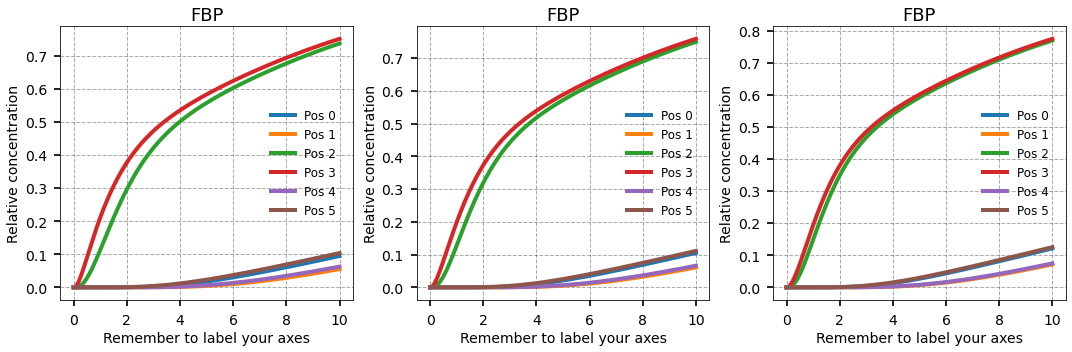

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, i in zip(axs.ravel(), (0.5, 1, 2)):
    m = m_bassham_base.copy()
    lm = llm_bassham.copy()

    m.update_parameters(
        {
            "k4f": i * m_bassham_base.parameters["k4f"],
            "k4r": i * m_bassham_base.parameters["k4r"],
        }
    )
    s = Simulator(m)
    s.initialise(y0=y0_bassham, test_run=False)
    t, y = s.simulate_to_steady_state()

    y_ss = dict(zip(m.compounds, y[-1]))
    v_ss = dict(m.get_fluxes_df(y_ss).iloc[0])

    ls = Simulator(lm)
    ls.initialise(label_y0=llm_y0_bassham, y_ss=y_ss, v_ss=v_ss)
    t, y = ls.simulate(10)
    ls.plot_label_distribution(
        "FBP",
        ax=ax,
        legend_kwargs={"loc": "best", "bbox_to_anchor": None, "borderaxespad": 1,},
    )

# Scans

In [19]:
from mpl_toolkits.mplot3d import Axes3D as _Axes3D
import concurrent.futures as _futures
import itertools as _it
import pandas as _pd
import numpy as _np

In [20]:
def _parameter_scan(
    factor, parameter_names, base_model, label_model, y0, label_y0, label_sim_kwargs,
):
    m = base_model.copy()
    lm = label_model.copy()

    m.update_parameters(
        parameters={i: m.parameters[i] * factor for i in parameter_names}
    )

    s = Simulator(m)
    s.initialise(y0=y0, test_run=False)

    try:
        t, y = s.simulate_to_steady_state()
    except:
        return (
            factor,
            dict(
                zip(label_model.compounds, _np.full(len(label_model.compounds), np.nan))
            ),
        )

    y_ss = dict(zip(m.compounds, y[-1]))
    v_ss = dict(m.get_fluxes_df(y_ss).iloc[0])

    ls = Simulator(lm)
    ls.initialise(label_y0=label_y0, y_ss=y_ss, v_ss=v_ss)
    t, y = ls.simulate(**label_sim_kwargs)
    return factor, dict(zip(label_model.compounds, y.T))


def parameter_scan(
    parameter_names,
    factors,
    base_model,
    label_model,
    y0,
    label_y0,
    label_sim_kwargs={"t_end": 10, "steps": 100},
):
    with _futures.ProcessPoolExecutor() as executor:
        results = dict(
            executor.map(
                _parameter_scan,
                factors,
                _it.repeat(parameter_names),
                _it.repeat(base_model),
                _it.repeat(label_model),
                _it.repeat(y0),
                _it.repeat(label_y0),
                _it.repeat(label_sim_kwargs),
            )
        )
    return results


def get_f6p_asymmetries(y, label_percentages):
    """Return interpolated asymmetries based on label percentage of F6P4"""
    y_interp = {}
    for i in ["F6P__0", "F6P__1", "F6P__2", "F6P__3", "F6P__4", "F6P__5"]:
        y_interp[i] = np.interp(x=label_percentages, xp=y["F6P__3"], fp=y[i])
    return np.array(
        [
            y_interp["F6P__3"] / y_interp["F6P__2"],
            y_interp["F6P__1"] / y_interp["F6P__4"],
            y_interp["F6P__0"] / y_interp["F6P__5"],
        ]
    ).T


def plot_3d_asymmetries(scan, label_percentages):
    scan = _pd.DataFrame(scan).T
    scan = scan.dropna()
    X = (scan.index.values * np.ones((len(label_percentages), 1))).T
    Y = label_percentages * np.ones((len(scan.index.values), 1))
    Z = np.array(
        [
            get_f6p_asymmetries(y=dict(v), label_percentages=label_percentages)
            for k, v in scan.iterrows()
        ]
    )
    fig, axs = plt.subplots(1, 3, figsize=[15, 5], subplot_kw={"projection": "3d"})
    for i in range(3):
        asym = Z[:, :, i]
        if np.max(asym) > 100:
            axs[i].plot_surface(X, Y, np.log(asym), cmap="rainbow", alpha=0.5)
            axs[i].set_title("log")
        else:
            axs[i].plot_surface(X, Y, asym, cmap="rainbow", alpha=0.5)
    fig.tight_layout()
    return fig, ax

In [21]:
enzymes = {
    "RuBisCO": ("Vmax_1",),
    "PGK": ("k2f", "k2r"),
    "GADPH": ("k3f", "k3r"),
    "TPI": ("k4f", "k4r"),
    "ALD": ("k5f", "k5r", "k8f", "k8r"),
    "FBPase": ("Vmax_6",),
    "TK": ("k7f", "k7r", "k10f", "k10r"),
    "SBPase": ("Vmax_9",),
    "RPI": ("k11f", "k11r"),
    "RPE": ("k12f", "k12r"),
    "PRK": ("Vmax_13",),
    "GPI": ("k14f", "k14r"),
    "PGM": ("k15f", "k15r"),
}


label_percentages = np.geomspace(0.01, 0.4, 100)

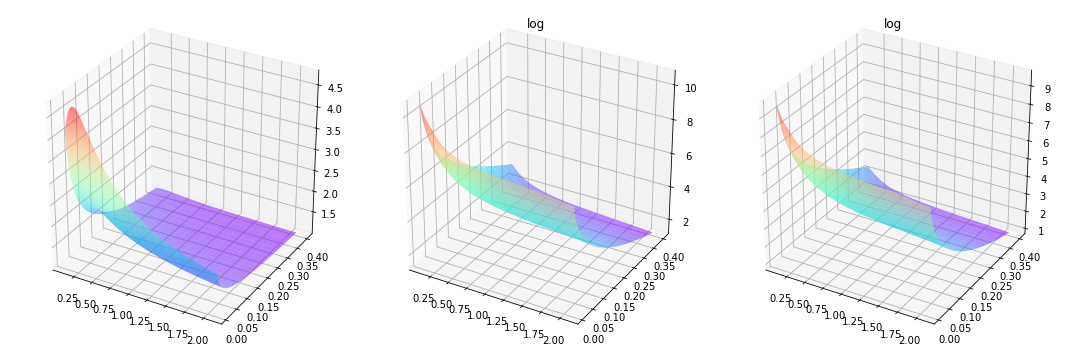

In [22]:
scan = parameter_scan(
    parameter_names=enzymes["TPI"],
    factors=np.geomspace(0.1, 10, 101),
    base_model=m_bassham_base,
    label_model=llm_bassham,
    y0=y0_bassham,
    label_y0=llm_y0_bassham,
)
fig, axs = plot_3d_asymmetries(scan, label_percentages)

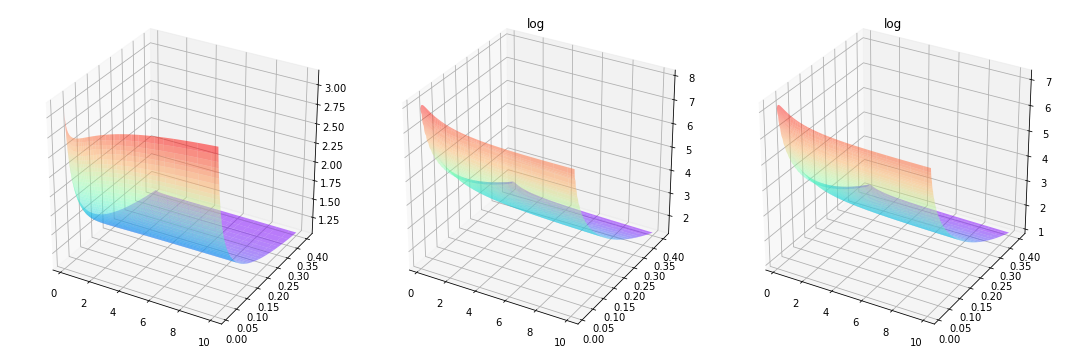

In [23]:
scan = parameter_scan(
    parameter_names=enzymes["ALD"],
    factors=np.geomspace(0.1, 10, 101),
    base_model=m_bassham_base,
    label_model=llm_bassham,
    y0=y0_bassham,
    label_y0=llm_y0_bassham,
)
fig, axs = plot_3d_asymmetries(scan, label_percentages)

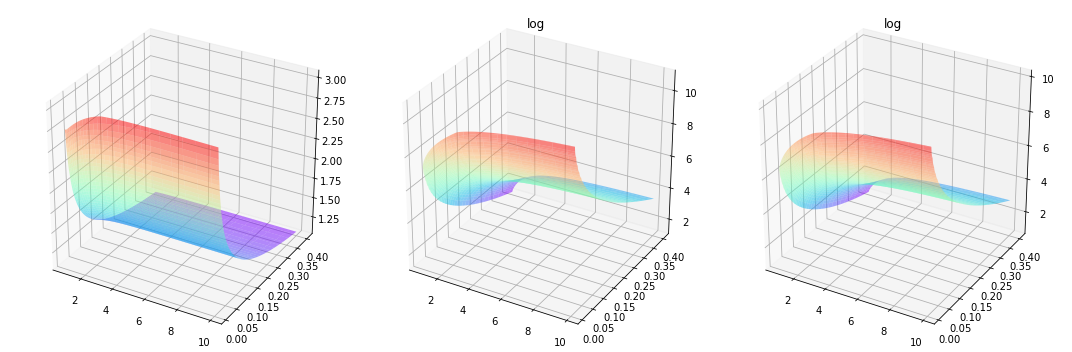

In [24]:
scan = parameter_scan(
    parameter_names=enzymes["TK"],
    factors=np.geomspace(0.1, 10, 101),
    base_model=m_bassham_base,
    label_model=llm_bassham,
    y0=y0_bassham,
    label_y0=llm_y0_bassham,
)
fig, axs = plot_3d_asymmetries(scan, label_percentages)

# Heatmaps

In [25]:
factors = [0.1, 0.2, 0.5, 1, 2, 5, 10]

scans = {}
for enzyme, parameter_names in enzymes.items():
    scans[enzyme] = parameter_scan(
        parameter_names=parameter_names,
        factors=factors,
        base_model=m_bassham_base,
        label_model=llm_bassham,
        y0=y0_bassham,
        label_y0=llm_y0_bassham,
    )

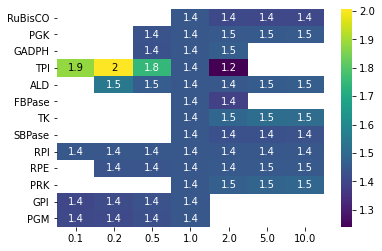

In [26]:
from modelbase.utils.plotting import heatmap_from_dataframe


def get_asymmetry_at_label_percentages(y, label_percentages, cpd1, cpd2, reference_cpd):
    """Return interpolated asymmetries based on label percentage of F6P4"""
    if np.any(np.isnan(y[reference_cpd])):
        return np.full(len(label_percentages), np.nan)
    y_interp = {}
    for i in (cpd1, cpd2):
        y_interp[i] = np.interp(x=label_percentages, xp=y[reference_cpd], fp=y[i])
    return y_interp[cpd1] / y_interp[cpd2]


heatmap = np.full((len(enzymes), len(factors)), np.nan)
for i, (enzyme, scan) in enumerate(scans.items()):
    for j, y in enumerate(scan.values()):
        heatmap[i, j] = get_asymmetry_at_label_percentages(
            y, [0.1], "F6P__3", "F6P__2", "F6P__3"
        )
heatmap = _pd.DataFrame(heatmap, columns=factors, index=scans.keys())
fig, ax, hm = heatmap_from_dataframe(heatmap)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()